In [1]:
# standard libraries
import pandas as pd
import numpy as np
import operator
import math
import os
import random

# visualizations
import matplotlib.pyplot as plt
import plotly.express as px
from mlxtend.plotting import scatterplotmatrix
import seaborn as sns
from IPython.display import Image
%matplotlib inline

# tensorflow
import tensorflow as tf
from tensorflow.keras import Sequential
from keras import metrics
from tensorflow import keras
from tensorflow.keras import initializers

# sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc

#classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

#for manually define MajorityVoting classifier
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
from sklearn.pipeline import Pipeline

c:\Users\lesli\AppData\Local\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\lesli\AppData\Local\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\lesli\AppData\Local\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\lesli\AppData\Local\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### <span style="color:black">load preprocessed data</span> 

In [2]:
X_train = pd.read_csv('./data/preprocessing/X_train_std.csv', index_col=0)  #please update the path
X_dev = pd.read_csv('./data/preprocessing/X_test_std.csv', index_col=0)
X_train_pca = pd.read_csv('./data/preprocessing/X_train.csv', index_col=0)
X_dev_pca = pd.read_csv('./data/preprocessing/X_test.csv', index_col=0)

y_train = pd.read_csv('./data/preprocessing/Y_train.csv', index_col=0)
y_train = y_train['class'].ravel()
y_dev = pd.read_csv('./data/preprocessing/Y_test.csv', index_col=0)
y_dev = y_dev['class'].ravel()

In [3]:
print(X_train_pca.shape, y_train.shape, '\n', X_dev_pca.shape, y_dev.shape,)
X_train
# X_train_pca
# X_dev
# X_dev_pca
# y_train
# y_dev

(493, 24) (493,) 
 (124, 24) (124,)


,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,-0.051718,-0.371870,-0.117473,-0.113640,-0.190204,0.271839,-0.086950,0.255449,-0.106090,0.032346,...,-0.009254,0.032896,-0.016423,-0.415480,-0.677342,0.961099,0.896422,-0.807639,-0.732001,0.732001
1,-0.082649,-0.255329,-0.258241,-0.122662,-0.190204,-0.918549,-0.086950,0.594013,-0.055261,-0.212867,...,0.037471,-0.248946,-0.378163,-0.415480,-0.192673,-0.701350,1.855807,-0.806019,-0.732001,0.732001
2,-0.742500,-0.102755,0.127827,-0.418395,0.690536,-0.600569,0.250534,-1.480421,-0.015255,-0.539975,...,0.089706,0.004712,-1.203240,-0.415480,-0.654039,1.668544,-0.375990,1.335195,1.366118,-1.366118
3,-0.299162,-0.880316,-0.258241,-0.153292,-0.190204,-0.698409,-0.058826,0.024875,-0.106090,-0.401466,...,0.042742,-0.154999,-1.368620,-0.415480,0.029800,-1.676889,-0.188597,-0.807077,-0.732001,0.732001
4,-0.402264,0.163415,-0.258241,-0.344270,-0.190204,-0.070602,-0.037243,0.623199,-0.106090,0.381691,...,-0.067080,-0.220762,0.656031,2.005753,-0.265672,-0.260115,1.187381,1.335195,1.366118,-1.366118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,0.072004,0.422262,-0.258241,-0.196221,-0.190204,-0.074678,-0.086950,0.523965,-0.037094,-0.370182,...,0.285149,-0.248946,0.285179,-0.190438,0.878823,0.669831,1.462549,1.335195,1.366118,-1.366118
489,-0.474435,-0.310291,-0.258241,-0.392055,-0.190204,-0.584262,-0.086950,-0.856558,-0.106090,-0.403387,...,-0.275542,-0.248946,-0.065627,0.197288,-0.422953,-0.535180,-0.355192,-0.785609,-0.732001,0.732001
490,-0.226991,-0.518858,-0.114248,-0.463995,-0.190204,2.281637,-0.086950,0.239396,-0.085121,0.005178,...,-0.275542,0.305343,0.104765,0.549653,-0.434888,0.106136,-0.982903,-0.798762,-0.732001,0.732001
491,-0.443505,-0.373119,-0.049872,1.056221,-0.190204,0.557206,-0.086950,-0.413653,-0.106090,-0.317916,...,-0.275542,-0.126815,-0.851067,0.214393,-0.723822,0.670962,-0.531446,-0.797738,-0.732001,0.732001


### 0. baseline model

In [4]:
# majority vote

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
print("Accuracy with Majority Class Baseline:", 
      dummy_clf.score(X_train, y_train), 
      dummy_clf.score(X_dev, y_dev))  #.83 vs .83 

# dummy_clf.fit(X_train_pca, y_train)
# print("Accuracy with Majority Class Baseline:", dummy_clf.score(X_train_pca, y_train), dummy_clf.score(X_dev_pca, y_dev))  #.83 vs .83 


Accuracy with Majority Class Baseline: 0.8255578093306288 0.8225806451612904


In [5]:
scores = cross_val_score(dummy_clf, X_train, y_train, cv=10)  #.83
print('Cross-validation scores: {}'.format(scores))
print("Cross-validation score mean w sd: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Cross-validation scores: [0.82       0.82       0.82       0.83673469 0.83673469 0.83673469
 0.83673469 0.81632653 0.81632653 0.81632653]
Cross-validation score mean w sd: 0.83 (+/- 0.01)


In [6]:
y_dev_dummy = dummy_clf.predict(X_dev)  #predict using dev data

print('Length y_pred: ', len(y_dev_dummy))
print('predictedY:', y_dev_dummy, "\n", 'actualY:', y_dev)

Length y_pred:  124
predictedY: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0] 
 actualY: [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0
 1 0 0 0 0 1 0 0 0 0 0 1 1]


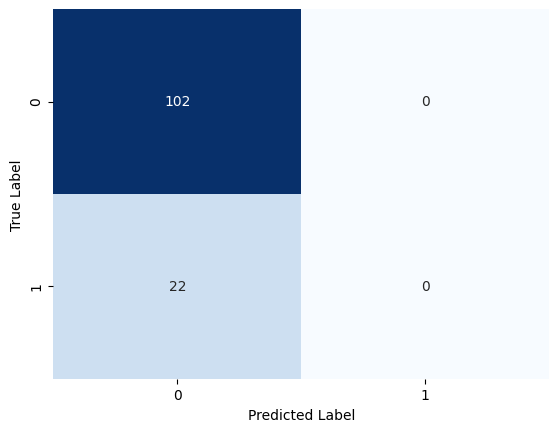

In [7]:
confusion_matrix = tf.math.confusion_matrix(y_dev, y_dev_dummy)  

label_names = np.unique(y_train)
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',  
                 xticklabels = label_names, yticklabels = label_names, cbar=False)

ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()

In [8]:
print("scikit.metrics")  
print('Precision score: %.3f' % precision_score(y_dev, y_dev_dummy, average='macro'))
print('Recall score: %.3f' % recall_score(y_dev, y_dev_dummy, average='macro'))
print('F1 score %.3f' % f1_score(y_dev, y_dev_dummy, average='macro'))
print()

scikit.metrics
Precision score: 0.411
Recall score: 0.500
F1 score 0.451



c:\Users\lesli\AppData\Local\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ROC AUC:  0.5


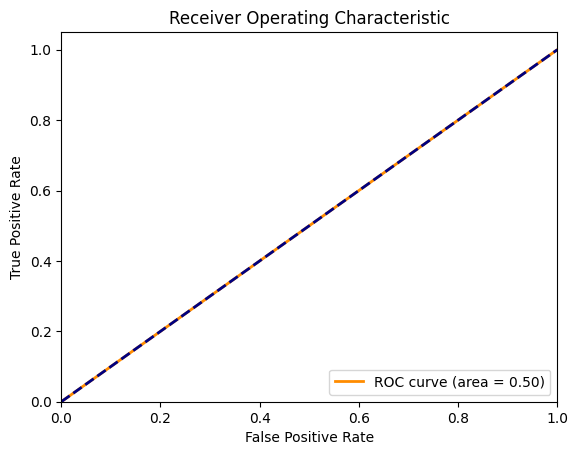

In [9]:
y_pred_proba = dummy_clf.predict_proba(X_dev_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(y_dev, y_pred_proba)
roc_auc = auc(fpr, tpr)
print("ROC AUC: ", np.round(roc_auc,3))

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### 1. decision tree dt

#### <span style="color:chocolate">1.1 dt using data before pca</span> 

In [10]:
# dt = DecisionTreeClassifier(random_state=0)  #1 vs .81
# dt = DecisionTreeClassifier(random_state=0, class_weight='balanced')   #1 vs .88
# dt = DecisionTreeClassifier(random_state=0, class_weight='balanced', criterion='entropy')  #1 vs .86
# dt = DecisionTreeClassifier(random_state=0, class_weight='balanced', criterion='entropy', min_impurity_decrease = .1)  #.84 vs .81
# dt = DecisionTreeClassifier(random_state=0, class_weight='balanced', max_depth=3)   #.88 vs .85
dt = DecisionTreeClassifier(random_state=0, class_weight='balanced', max_features = 'sqrt')   #1 vs .89

dt.fit(X_train, y_train)

print ('dt using data before pca:')
print('Features:', X_train.columns)
print ('Feature importances:', dt.feature_importances_)
print ('Accuracy:', dt.score(X_train, y_train), dt.score(X_dev, y_dev))

dt using data before pca:
Features: Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56'],
      dtype='object')
Feature importances: [0.02950318 0.         0.         0.01874496 0.01535343 0.
 0.         0.00482897 0.         0.         0.         0.
 0.11953859 0.         0.         0.         0.         0.
 0.         0.         0.         0.08778306 0.0085865  0.
 0.         0.03118351 0.06875198 0.         0.07947724 0.00932939
 0.02558971 0.         0.06365645 0.         0.         0.09242405
 0.         0.         0.         0.         0.00965795 0.0040568
 0.         0.01266433 0.0862866  0.00483541 0.09066762 0.03742802
 0.         0.00474684 0.         0.02402537 0.   

In [11]:
scores = cross_val_score(dt, X_train, y_train, cv=10)  #10-fold cross validation to assist w finetuning parametres
print('Cross-validation scores: {}'.format(scores))
print("Cross-validation score mean w sd: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Cross-validation scores: [0.8        0.8        0.8        0.85714286 0.89795918 0.79591837
 0.79591837 0.89795918 0.7755102  0.83673469]
Cross-validation score mean w sd: 0.83 (+/- 0.04)


In [12]:
y_dev_dt = dt.predict(X_dev)

print('Length y_pred: ', len(y_dev_dt))
print('predictedY:', y_dev_dt, "\n", 'actualY:', y_dev)

Length y_pred:  124
predictedY: [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 1 0 0 1] 
 actualY: [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0
 1 0 0 0 0 1 0 0 0 0 0 1 1]


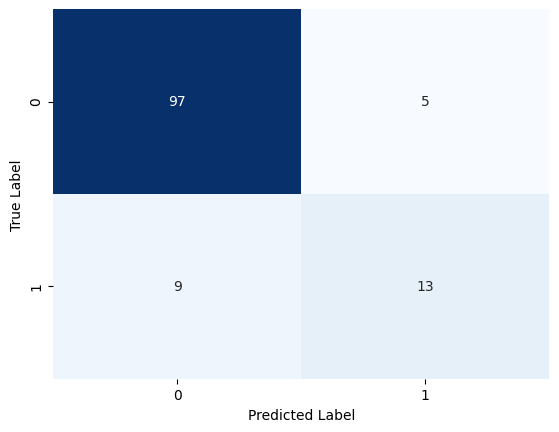

In [13]:
confusion_matrix = tf.math.confusion_matrix(y_dev, y_dev_dt)  

label_names = np.unique(y_train)
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',  
                 xticklabels = label_names, yticklabels = label_names, cbar=False)

ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()

In [14]:
print("scikit.metrics")  
print('Precision score: %.3f' % precision_score(y_dev, y_dev_dt, average='macro'))
print('Recall score: %.3f' % recall_score(y_dev, y_dev_dt, average='macro'))
print('F1 score %.3f' % f1_score(y_dev, y_dev_dt, average='macro'))
print()

scikit.metrics
Precision score: 0.819
Recall score: 0.771
F1 score 0.791



ROC AUC:  0.771


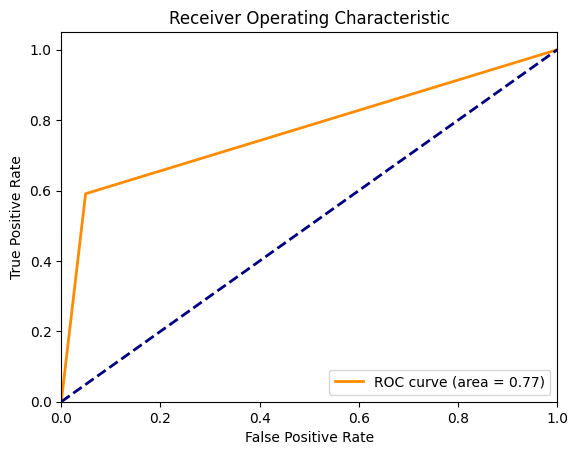

In [15]:
y_pred_proba = dt.predict_proba(X_dev)[:, 1]
fpr, tpr, thresholds = roc_curve(y_dev, y_pred_proba)
roc_auc = auc(fpr, tpr)
print("ROC AUC: ", np.round(roc_auc,3))

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


#### 1.2 dt using data after pca

In [16]:
# dt = DecisionTreeClassifier(random_state=0)   #1 vs 0.80 
# dt = DecisionTreeClassifier(random_state=0, class_weight='balanced')   #1 vs 0.78
# dt = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=3, max_features='sqrt')   #.88 vs 0.83
# dt = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=3, min_impurity_decrease=.1, max_features='sqrt')   #.826 vs .823 
                                                                            #- same as baseline majority dt  
dt = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=3, max_features='sqrt')  #.87 vs .85 

dt.fit(X_train_pca, y_train)

print ('dt using data after pca:')
print('Features:', X_train_pca.columns)
print ('Feature importances:', dt.feature_importances_)
print ('Accuracy:', dt.score(X_train_pca, y_train), dt.score(X_dev_pca, y_dev))

dt using data after pca:
Features: Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'],
      dtype='object')
Feature importances: [0.         0.46051502 0.         0.         0.31323891 0.
 0.         0.         0.06492501 0.         0.         0.
 0.         0.         0.         0.03944418 0.02643266 0.
 0.         0.09544422 0.         0.         0.         0.        ]
Accuracy: 0.8762677484787018 0.8548387096774194


In [17]:
scores = cross_val_score(dt, X_train_pca, y_train, cv=10)  #10-fold cross validation to fine tune based on train
print('Cross-validation scores: {}'.format(scores))
print("Cross-validation score mean w sd: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Cross-validation scores: [0.84       0.84       0.88       0.83673469 0.81632653 0.81632653
 0.87755102 0.87755102 0.91836735 0.83673469]
Cross-validation score mean w sd: 0.85 (+/- 0.03)


In [18]:
y_dev_dt = dt.predict(X_dev_pca)

print('Length y_pred: ', len(y_dev_dt))
print('predictedY:', y_dev_dt, "\n", 'actualY:', y_dev)

Length y_pred:  124
predictedY: [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0] 
 actualY: [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0
 1 0 0 0 0 1 0 0 0 0 0 1 1]


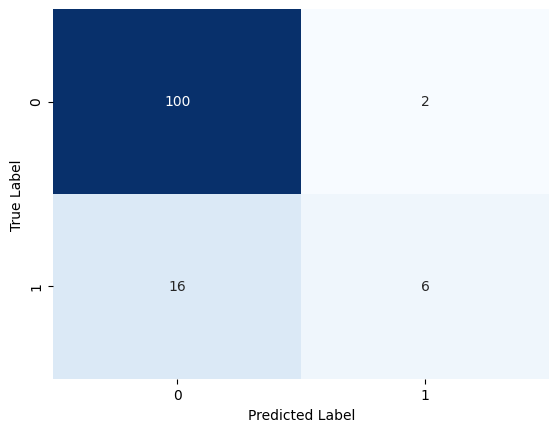

In [19]:
confusion_matrix = tf.math.confusion_matrix(y_dev, y_dev_dt)  

label_names = np.unique(y_train)
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',  
                 xticklabels = label_names, yticklabels = label_names, cbar=False)

ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()

In [20]:
print("scikit.metrics")  
print('Precision score: %.3f' % precision_score(y_dev, y_dev_dt, average='macro'))
print('Recall score: %.3f' % recall_score(y_dev, y_dev_dt, average='macro'))
print('F1 score %.3f' % f1_score(y_dev, y_dev_dt, average='macro'))
print()

scikit.metrics
Precision score: 0.806
Recall score: 0.627
F1 score 0.659



ROC AUC:  0.667


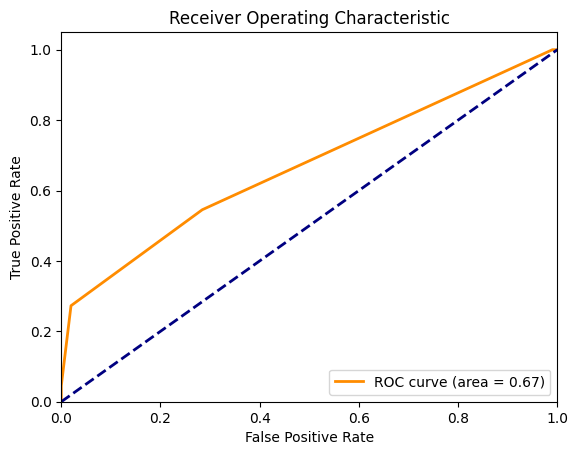

In [21]:
y_pred_proba = dt.predict_proba(X_dev_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(y_dev, y_pred_proba)
roc_auc = auc(fpr, tpr)
print("ROC AUC: ", np.round(roc_auc,3))

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### 2. random forest rf

#### <span style="color:chocolate">2.1 rf using data before pca</span> 

In [22]:
tf.random.set_seed(1)
np.random.seed(1)

# rf = RandomForestClassifier(random_state=0)  #1 vs .92
# rf = RandomForestClassifier(random_state=0, class_weight='balanced')  #1 vs .91
# rf = RandomForestClassifier(random_state=0, n_estimators = 50)  #1 vs .89
# rf = RandomForestClassifier(random_state=0, bootstrap = False)  #1 vs .92
# rf = RandomForestClassifier(random_state=0, max_depth = 10)  #1 vs .93
rf = RandomForestClassifier(random_state=0, max_depth = 10, max_features = 'sqrt')  #1 vs .93

rf.fit(X_train, y_train)

print ('Accuracy of train vs dev: ', rf.score(X_train, y_train), rf.score(X_dev, y_dev))

Accuracy of train vs dev:  1.0 0.9274193548387096


In [23]:
scores = cross_val_score(rf, X_train, y_train, cv=10)  #10-fold cross validation
print('Cross-validation scores: {}'.format(scores))
print("Cross-validation score mean w sd: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Cross-validation scores: [0.88       0.96       0.94       0.81632653 0.93877551 0.85714286
 0.93877551 0.95918367 1.         0.89795918]
Cross-validation score mean w sd: 0.92 (+/- 0.05)


In [24]:
y_dev_rf = rf.predict(X_dev)

print('Length y_pred: ', len(y_dev_rf))
print('predictedY:', y_dev_rf, "\n", 'actualY:', y_dev)

Length y_pred:  124
predictedY: [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1] 
 actualY: [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0
 1 0 0 0 0 1 0 0 0 0 0 1 1]


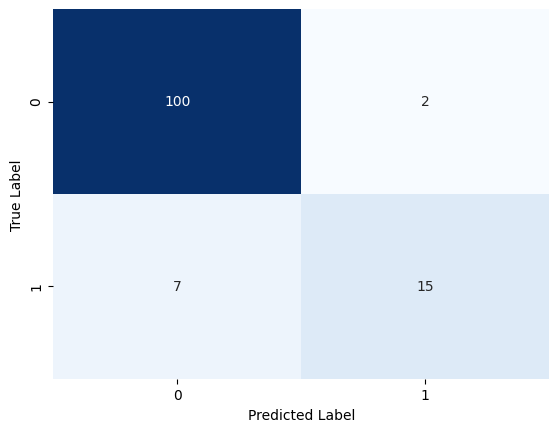

In [25]:
confusion_matrix = tf.math.confusion_matrix(y_dev, y_dev_rf)  

label_names = np.unique(y_train)
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',  
                 xticklabels = label_names, yticklabels = label_names, cbar=False)

ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()

In [26]:
print("scikit.metrics")  
print('Precision score: %.3f' % precision_score(y_dev, y_dev_rf, average='macro'))
print('Recall score: %.3f' % recall_score(y_dev, y_dev_rf, average='macro'))
print('F1 score %.3f' % f1_score(y_dev, y_dev_rf, average='macro'))
print()

scikit.metrics
Precision score: 0.908
Recall score: 0.831
F1 score 0.863



ROC AUC:  0.907


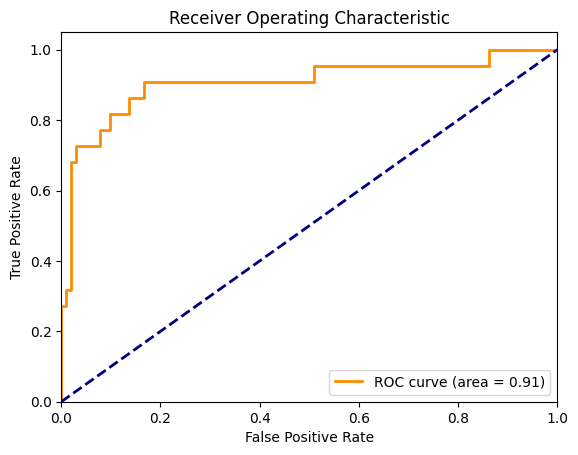

In [27]:
y_pred_proba = rf.predict_proba(X_dev)[:, 1]
fpr, tpr, thresholds = roc_curve(y_dev, y_pred_proba)
roc_auc = auc(fpr, tpr)
print("ROC AUC: ", np.round(roc_auc,3))

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


#### 2.2 rf using data after pca

In [28]:
tf.random.set_seed(1)
np.random.seed(1)

# rf = RandomForestClassifier(random_state=0)  #1 vs 0.88
# rf = RandomForestClassifier(random_state=0, class_weight='balanced')  #1 vs 0.85
# rf = RandomForestClassifier(random_state=0, n_estimators=50, bootstrap=False)  #1 vs 0.88
# rf = RandomForestClassifier(random_state=0, n_estimators=50, bootstrap=False, max_depth=10)  #.99 vs 0.86
rf = RandomForestClassifier(random_state=0, n_estimators=50, bootstrap=False, max_features='sqrt')  #1 vs .88

rf.fit(X_train_pca, y_train)

print ('Accuracy of train vs dev: ', rf.score(X_train_pca, y_train), rf.score(X_dev_pca, y_dev))

Accuracy of train vs dev:  1.0 0.8790322580645161


In [29]:
scores = cross_val_score(rf, X_train_pca, y_train, cv=10)  #10-fold cross validation
print('Cross-validation scores: {}'.format(scores))
print("Cross-validation score mean w sd: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Cross-validation scores: [0.88       0.94       0.92       0.83673469 0.87755102 0.85714286
 0.83673469 0.89795918 0.93877551 0.85714286]
Cross-validation score mean w sd: 0.88 (+/- 0.04)


In [30]:
y_dev_rf = rf.predict(X_dev_pca)

print('Length y_pred: ', len(y_dev_rf))
print('predictedY:', y_dev_rf, "\n", 'actualY:', y_dev)

Length y_pred:  124
predictedY: [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1] 
 actualY: [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0
 1 0 0 0 0 1 0 0 0 0 0 1 1]


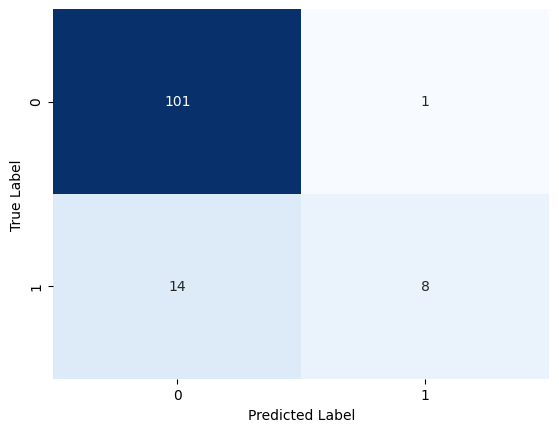

In [31]:
confusion_matrix = tf.math.confusion_matrix(y_dev, y_dev_rf)  

label_names = np.unique(y_train)
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',  
                 xticklabels = label_names, yticklabels = label_names, cbar=False)

ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()

In [32]:
print("scikit.metrics")  
print('Precision score: %.3f' % precision_score(y_dev, y_dev_rf, average='macro'))
print('Recall score: %.3f' % recall_score(y_dev, y_dev_rf, average='macro'))
print('F1 score %.3f' % f1_score(y_dev, y_dev_rf, average='macro'))
print()

scikit.metrics
Precision score: 0.884
Recall score: 0.677
F1 score 0.724



ROC AUC:  0.84


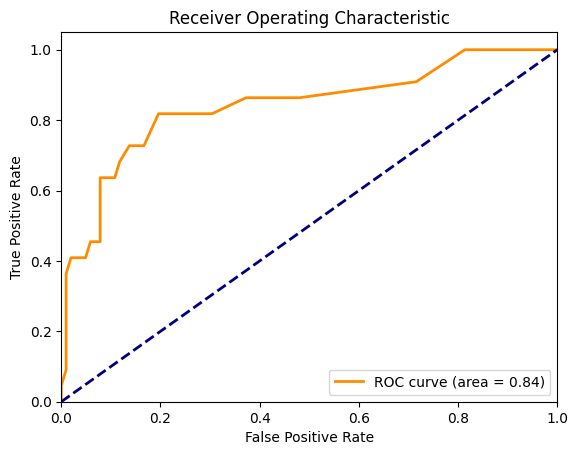

In [33]:
y_pred_proba = rf.predict_proba(X_dev_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(y_dev, y_pred_proba)
roc_auc = auc(fpr, tpr)
print("ROC AUC: ", np.round(roc_auc,3))

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### 3. bagging/adaboost ensembles

#### 3.1 using data before pca

In [34]:
#create ensemble of 500 dt fit on different bootstrap samples w replacement of train data
bag = BaggingClassifier(random_state=0, estimator=dt, n_estimators=500)
bag = bag.fit(X_train, y_train)
y_train_bag = bag.predict(X_train)
y_dev_bag = bag.predict(X_dev)
bag_train = accuracy_score(y_train, y_train_bag) 
bag_test = accuracy_score(y_dev, y_dev_bag) 
print('Bagging train/test accuracies %.3f/%.3f' % (bag_train, bag_test))  #1 vs .90

#create ensemble of 500 dt fit on different bootstrap samples wo replacement of train data
ada = AdaBoostClassifier(random_state=0, estimator=dt, n_estimators=500)
ada = ada.fit(X_train, y_train)
y_train_ada = ada.predict(X_train)
y_dev_ada = ada.predict(X_dev)
ada_train = accuracy_score(y_train, y_train_ada) 
ada_test = accuracy_score(y_dev, y_dev_ada) 
print('AdaBoost train/test accuracies %.3f/%.3f' % (ada_train, ada_test))  #1 vs .83

Bagging train/test accuracies 0.933/0.855
AdaBoost train/test accuracies 1.000/0.895


#### 3.2 using data after pca

In [35]:
#create ensemble of 500 dt fit on different bootstrap samples w replacement of train data
bag = BaggingClassifier(random_state=0, estimator=dt, n_estimators=500)
bag = bag.fit(X_train_pca, y_train)
y_train_bag = bag.predict(X_train_pca)
y_dev_bag = bag.predict(X_dev_pca)
bag_train = accuracy_score(y_train, y_train_bag) 
bag_test = accuracy_score(y_dev, y_dev_bag) 
print('Bagging train/test accuracies %.3f/%.3f' % (bag_train, bag_test))  #1 vs .84

#create ensemble of 500 dt fit on different bootstrap samples wo replacement of train data
ada = AdaBoostClassifier(random_state=0, estimator=dt, n_estimators=500)
ada = ada.fit(X_train_pca, y_train)
y_train_ada = ada.predict(X_train_pca)
y_dev_ada = ada.predict(X_dev_pca)
ada_train = accuracy_score(y_train, y_train_ada) 
ada_test = accuracy_score(y_dev, y_dev_ada) 
print('AdaBoost train/test accuracies %.3f/%.3f' % (ada_train, ada_test))  #1 vs .84

Bagging train/test accuracies 0.892/0.855
AdaBoost train/test accuracies 1.000/0.855
